## Imports

In [50]:
import pandas as pd
import numpy as np
import plotly.express as px
import kaleido
import matplotlib.pyplot as plt
import os
from matplotlib.gridspec import GridSpec


## Data Paths

In [3]:
year = 2050

# data dir
data_dir = os.path.join(os.path.dirname(os.getcwd()), 'data', 'output_data')

# output figure dir
fig_dir = os.path.join(os.path.dirname(os.getcwd()), 'figures')

# path to suitability analysis df
suitability_data_path = os.path.join(data_dir, f'capacity_factor_analysis_{year}.csv')

## Functions

In [276]:
df.trading_region.nunique()

5

## Collect Data

In [270]:
# Define the sorter
sorter = ['baseline', 'dac', 'farmland', 'env_1', 'env_1_1km', 'env_1_5km',
       'env_1_10km', 'env_2', 'env_2_1km', 'env_2_5km', 'env_2_10km',
       'env_3', 'env_3_1km', 'env_3_5km', 'env_3_10km', 'dac_farm_env1',
       'dac_farm_env2', 'dac_farm_env3', 'dac_farm_env1_1km',
       'dac_farm_env2_1km', 'dac_farm_env3_1km', 'dac_farm_env1_5km',
       'dac_farm_env2_5km', 'dac_farm_env3_5km']

sorter_reduced = ['baseline', 'dac', 'farmland', 'env_1', 'env_1_5km',
       'env_2', 'env_2_5km',
       'env_3',  'env_3_5km', 'dac_farm_env1',
       'dac_farm_env2', 'dac_farm_env3', 
       'dac_farm_env1_5km',
       'dac_farm_env2_5km', 'dac_farm_env3_5km']

# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(sorter, range(len(sorter))))
sorterIndex = dict(zip(sorter_reduced, range(len(sorter_reduced))))

In [269]:
df = pd.read_csv(suitability_data_path)
df = df[df.analysis.isin(sorter_reduced)]

In [271]:


wind = df[df.tech_name_simple == 'Wind'].copy()
wind['Rank'] = wind['analysis'].map(sorterIndex)
wind.sort_values(['Rank'], ascending = [False], inplace = True)
wind['clean_grid_mwh'] = wind['clean_grid_mwh'] / 1000000
wind['total_gen'] = wind['total_gen'] / 1000000
wind['diff'] = wind['clean_grid_mwh'] - wind['total_gen']
region_list = sorted(list(wind.region_name.unique()))
analysis_list = (list(wind.analysis.unique()))

solar = df[df.tech_name_simple == 'Solar PV'].copy()
solar['Rank'] = solar['analysis'].map(sorterIndex)
solar.sort_values(['Rank'], ascending = [False], inplace = True)
solar['clean_grid_mwh'] = solar['clean_grid_mwh'] / 1000000
solar['total_gen'] = solar['total_gen'] / 1000000
solar['diff'] = solar['clean_grid_mwh'] - solar['total_gen']
region_list = sorted(list(solar.region_name.unique()))
analysis_list = (list(solar.analysis.unique()))

### Wind

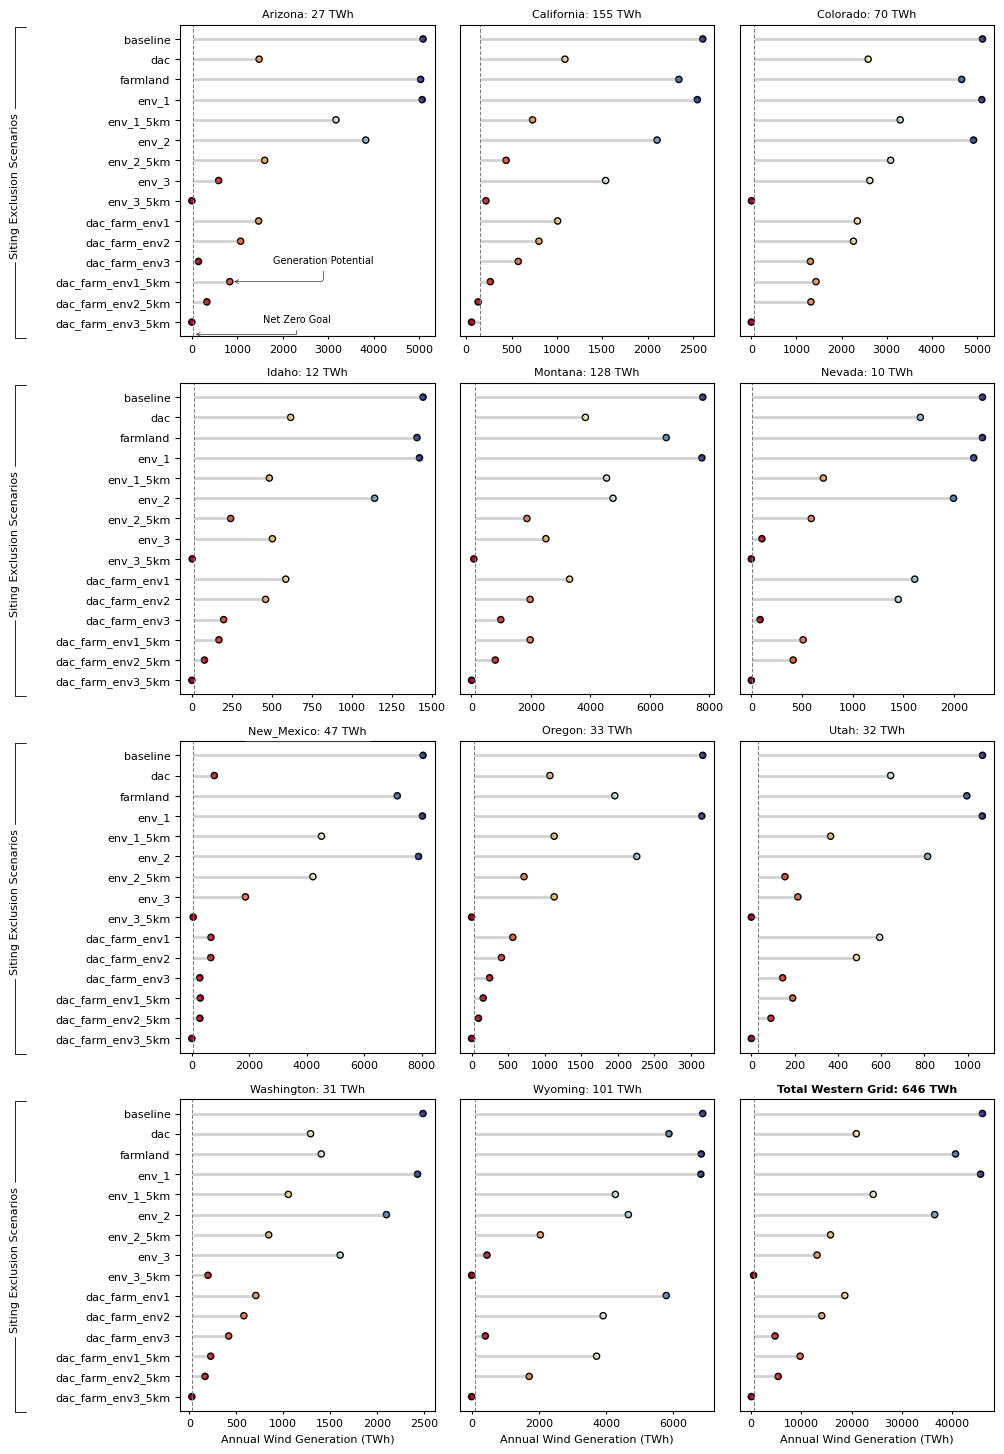

In [274]:
height = 18
width = 10.5

fig = plt.figure()
fig.set_figheight(height)
fig.set_figwidth(width)

spec = GridSpec(ncols=3, 
                nrows=4,
                width_ratios=[.33, .33, .33], 
                wspace=0.1,
                hspace=0.15,
                height_ratios=[.25, .25, .25, .25])


ax_1a =fig.add_subplot(spec[0,0])
ax_1b =fig.add_subplot(spec[0,1])
ax_1c =fig.add_subplot(spec[0,2])

ax_2a =fig.add_subplot(spec[1,0])
ax_2b =fig.add_subplot(spec[1,1])
ax_2c =fig.add_subplot(spec[1,2])

ax_3a =fig.add_subplot(spec[2,0])
ax_3b =fig.add_subplot(spec[2,1])
ax_3c =fig.add_subplot(spec[2,2])

ax_4a =fig.add_subplot(spec[3,0])
ax_4b =fig.add_subplot(spec[3,1])
ax_4c =fig.add_subplot(spec[3,2])

#ax_4c.set_axis_off()
ax_list = [ax_1a, ax_1b, ax_1c, ax_2a, ax_2b, ax_2c, ax_3a, ax_3b, ax_3c, ax_4a, ax_4b]

for i in range(len(region_list)):

    region = region_list[i]
    plot_df = wind[wind.region_name == region]
    my_range=range(1,len(plot_df.index)+1)
    
    vmax =max(plot_df.total_gen.max(), plot_df.clean_grid_mwh.max())

    ax_list[i].hlines(y=my_range, xmin=plot_df['clean_grid_mwh'], xmax=plot_df['total_gen'], color='grey', alpha=.35, lw=2)
    ax_list[i].scatter(plot_df['total_gen'], my_range, c=plot_df['total_gen'], s = 20, edgecolor='black', alpha=1 , 
                cmap='RdYlBu', vmin=0, vmax=vmax)

    # # Add title and axis names
    ax_list[i].axvline(x = plot_df['clean_grid_mwh'].mean(), linestyle='dashed', color = 'gray', lw=.75)
    ax_list[i].set_yticks(my_range)
    ax_list[i].set_yticklabels(analysis_list)
    plt.setp(ax_list[i].get_yticklabels(), size=8)
    ax_list[i].tick_params(axis='x',which='both', bottom=True, top=False, labelbottom=True, size=2, labelsize=8)
    if i in [1, 2, 4, 5, 7, 8, 10]:
        ax_list[i].tick_params(axis='y',which='both', bottom=False, top=False, left=False, labelleft=False, labelbottom=False)
    ax_list[i].annotate(f"{region.title()}: {int(round(plot_df['clean_grid_mwh'].mean(), 0))} TWh", xy=(.5, 1.05), xytext=(.5, 1.05), xycoords='axes fraction', 
                        fontsize=8, ha='center', va='top',
            bbox=dict(boxstyle='square', fc='white', color='white'))
            #arrowprops=dict(arrowstyle='-[, widthB=11.2, lengthB=2', lw=.75, color='k'))

west_df = wind.copy()
west_df = west_df[['analysis', 'Rank', 'total_gen', 'clean_grid_mwh']].groupby(['analysis', 'Rank'], as_index=False).sum()
west_df.sort_values(['Rank'], ascending = [False], inplace = True)

my_range=range(1,len(west_df.index)+1)
    
vmax =max(west_df.total_gen.max(), west_df.clean_grid_mwh.max())

ax_4c.hlines(y=my_range, xmin=west_df['clean_grid_mwh'], xmax=west_df['total_gen'], color='grey', alpha=.35, lw=2)
ax_4c.scatter(west_df['total_gen'], my_range, c=west_df['total_gen'], s = 20, edgecolor='black', alpha=1 , 
                cmap='RdYlBu', vmin=0, vmax=vmax)
ax_4c.axvline(x = west_df['clean_grid_mwh'].mean(), linestyle='dashed', color = 'gray', lw=.75)
ax_4c.tick_params(axis='y',which='both', bottom=False, top=False, left=False, labelleft=False, labelbottom=False)
ax_4c.tick_params(axis='x',which='both', bottom=True, top=False, labelbottom=True, size=2, labelsize=8)
ax_4c.annotate(f"Total Western Grid: {int(round(west_df['clean_grid_mwh'].mean(), 0))} TWh", xy=(.5, 1.05), xytext=(.5, 1.05), xycoords='axes fraction', 
                        fontsize=8, ha='center', va='top', weight='bold',
                        bbox=dict(boxstyle='square', fc='white', color='white'))

ax_4a.set_xlabel('Annual Wind Generation (TWh)', size=8)
ax_4b.set_xlabel('Annual Wind Generation (TWh)', size=8)
ax_4c.set_xlabel('Annual Wind Generation (TWh)', size=8)


ax_1a.annotate(
    'Net Zero Goal',
    xy=(27, .4), xycoords='data',
    xytext=(50, 8.5), textcoords='offset points',fontsize=7,
    arrowprops=dict(arrowstyle="->",  lw=.4,
                    connectionstyle="angle,angleA=90,angleB=0,rad=0"))

ax_1a.annotate(
    'Generation Potential',
    xy=(870, 3), xycoords='data',
    xytext=(30, 13), textcoords='offset points',fontsize=7,
    arrowprops=dict(arrowstyle="->",  lw=.4,
                    connectionstyle="angle,angleA=90,angleB=0,rad=3"))

ax_1a.annotate('Siting Exclusion Scenarios', xy=(-.65, .72), xytext=(-.65, .72), xycoords='axes fraction', 
            fontsize=8, ha='center', va='top', rotation = 90,
            bbox=dict(boxstyle='square', fc='white', color='white'),
            arrowprops=dict(arrowstyle=']-, widthA=14, lengthA=1, angleA=90',lw=.6, color='k'))

ax_2a.annotate('Siting Exclusion Scenarios', xy=(-.65, .72), xytext=(-.65, .72), xycoords='axes fraction', 
            fontsize=8, ha='center', va='top', rotation = 90,
            bbox=dict(boxstyle='square', fc='white', color='white'),
            arrowprops=dict(arrowstyle=']-, widthA=14, lengthA=1, angleA=90',lw=.6, color='k'))
ax_3a.annotate('Siting Exclusion Scenarios', xy=(-.65, .72), xytext=(-.65, .72), xycoords='axes fraction', 
            fontsize=8, ha='center', va='top', rotation = 90,
            bbox=dict(boxstyle='square', fc='white', color='white'),
            arrowprops=dict(arrowstyle=']-, widthA=14, lengthA=1, angleA=90',lw=.6, color='k'))

ax_4a.annotate('Siting Exclusion Scenarios', xy=(-.65, .72), xytext=(-.65, .72), xycoords='axes fraction', 
            fontsize=8, ha='center', va='top', rotation = 90,
            bbox=dict(boxstyle='square', fc='white', color='white'),
            arrowprops=dict(arrowstyle=']-, widthA=14, lengthA=1, angleA=90',lw=.6, color='k'))

plt.show()

#### Solar PV

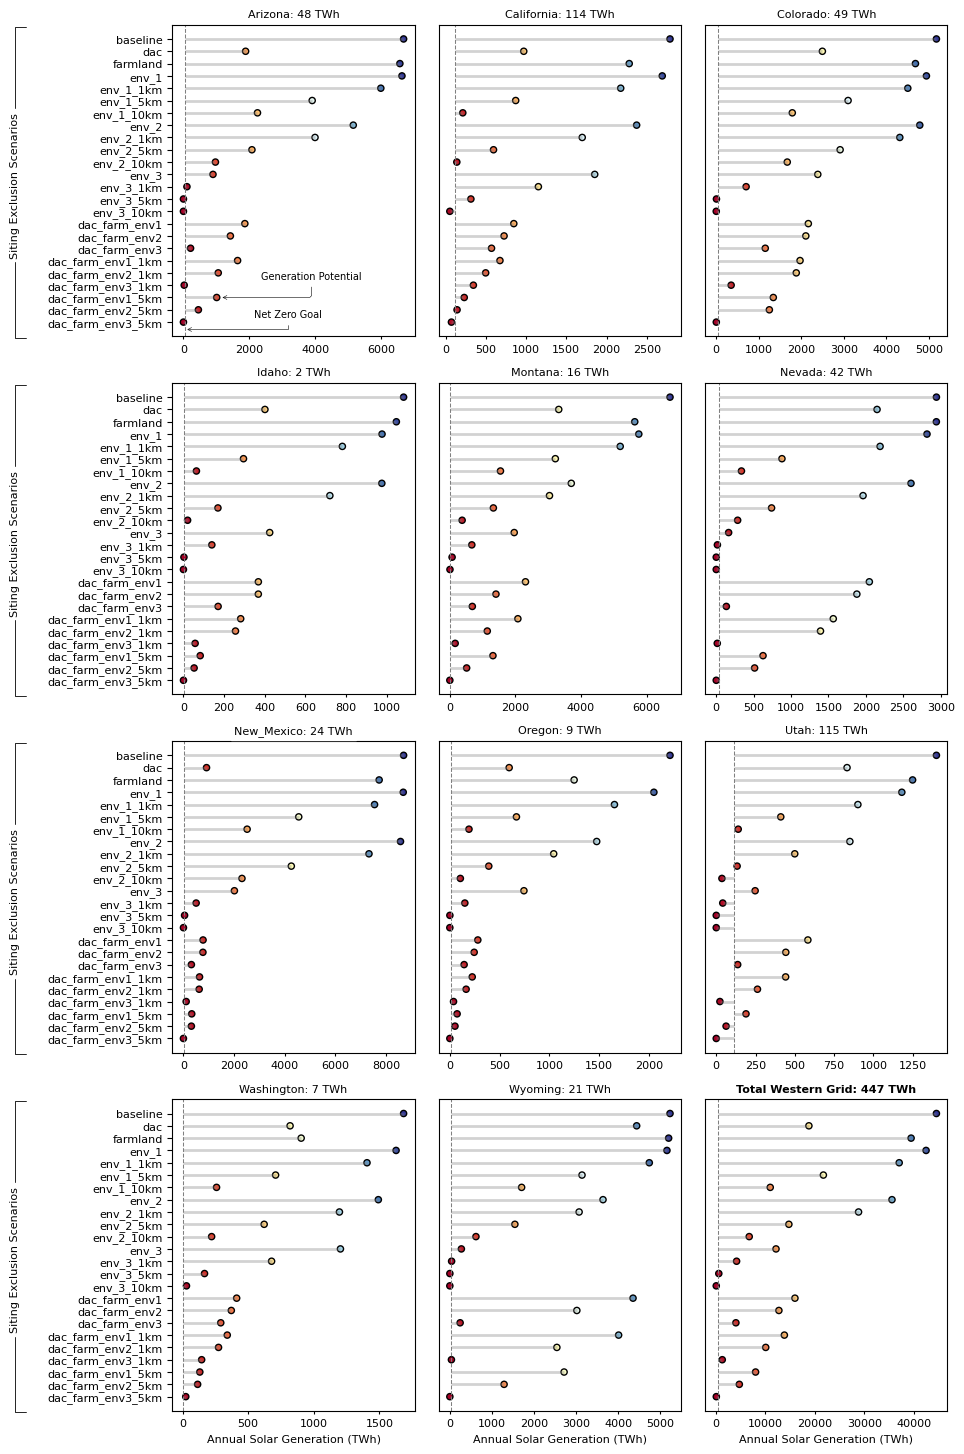

In [267]:
height = 18
width = 10

fig = plt.figure()
fig.set_figheight(height)
fig.set_figwidth(width)

spec = GridSpec(ncols=3, 
                nrows=4,
                width_ratios=[.33, .33, .33], 
                wspace=0.1,
                hspace=0.15,
                height_ratios=[.25, .25, .25, .25])


ax_1a =fig.add_subplot(spec[0,0])
ax_1b =fig.add_subplot(spec[0,1])
ax_1c =fig.add_subplot(spec[0,2])

ax_2a =fig.add_subplot(spec[1,0])
ax_2b =fig.add_subplot(spec[1,1])
ax_2c =fig.add_subplot(spec[1,2])

ax_3a =fig.add_subplot(spec[2,0])
ax_3b =fig.add_subplot(spec[2,1])
ax_3c =fig.add_subplot(spec[2,2])

ax_4a =fig.add_subplot(spec[3,0])
ax_4b =fig.add_subplot(spec[3,1])
ax_4c =fig.add_subplot(spec[3,2])

#ax_4c.set_axis_off()
ax_list = [ax_1a, ax_1b, ax_1c, ax_2a, ax_2b, ax_2c, ax_3a, ax_3b, ax_3c, ax_4a, ax_4b]

for i in range(len(region_list)):

    region = region_list[i]
    plot_df = solar[solar.region_name == region]
    my_range=range(1,len(plot_df.index)+1)
    
    vmax =max(plot_df.total_gen.max(), plot_df.clean_grid_mwh.max())

    ax_list[i].hlines(y=my_range, xmin=plot_df['clean_grid_mwh'], xmax=plot_df['total_gen'], color='grey', alpha=.35, lw=2)
    ax_list[i].scatter(plot_df['total_gen'], my_range, c=plot_df['total_gen'], s = 20, edgecolor='black', alpha=1 , 
                cmap='RdYlBu', vmin=0, vmax=vmax)

    # # Add title and axis names
    ax_list[i].axvline(x = plot_df['clean_grid_mwh'].mean(), linestyle='dashed', color = 'gray', lw=.75)
    ax_list[i].set_yticks(my_range)
    ax_list[i].set_yticklabels(analysis_list)
    plt.setp(ax_list[i].get_yticklabels(), size=8)
    ax_list[i].tick_params(axis='x',which='both', bottom=True, top=False, labelbottom=True, size=2, labelsize=8)
    if i in [1, 2, 4, 5, 7, 8, 10]:
        ax_list[i].tick_params(axis='y',which='both', bottom=False, top=False, left=False, labelleft=False, labelbottom=False)
    ax_list[i].annotate(f"{region.title()}: {int(round(plot_df['clean_grid_mwh'].mean(), 0))} TWh", xy=(.5, 1.05), xytext=(.5, 1.05), xycoords='axes fraction', 
                        fontsize=8, ha='center', va='top',
            bbox=dict(boxstyle='square', fc='white', color='white'))
            #arrowprops=dict(arrowstyle='-[, widthB=11.2, lengthB=2', lw=.75, color='k'))

west_df = solar.copy()
west_df = west_df[['analysis', 'Rank', 'total_gen', 'clean_grid_mwh']].groupby(['analysis', 'Rank'], as_index=False).sum()
west_df.sort_values(['Rank'], ascending = [False], inplace = True)

my_range=range(1,len(west_df.index)+1)
    
vmax =max(west_df.total_gen.max(), west_df.clean_grid_mwh.max())

ax_4c.hlines(y=my_range, xmin=west_df['clean_grid_mwh'], xmax=west_df['total_gen'], color='grey', alpha=.35, lw=2)
ax_4c.scatter(west_df['total_gen'], my_range, c=west_df['total_gen'], s = 20, edgecolor='black', alpha=1 , 
                cmap='RdYlBu', vmin=0, vmax=vmax)
ax_4c.axvline(x = west_df['clean_grid_mwh'].mean(), linestyle='dashed', color = 'gray', lw=.75)
ax_4c.tick_params(axis='y',which='both', bottom=False, top=False, left=False, labelleft=False, labelbottom=False)
ax_4c.tick_params(axis='x',which='both', bottom=True, top=False, labelbottom=True, size=2, labelsize=8)
ax_4c.annotate(f"Total Western Grid: {int(round(west_df['clean_grid_mwh'].mean(), 0))} TWh", xy=(.5, 1.05), xytext=(.5, 1.05), xycoords='axes fraction', 
                        fontsize=8, ha='center', va='top', weight='bold',
                        bbox=dict(boxstyle='square', fc='white', color='white'))

ax_4a.set_xlabel('Annual Solar Generation (TWh)', size=8)
ax_4b.set_xlabel('Annual Solar Generation (TWh)', size=8)
ax_4c.set_xlabel('Annual Solar Generation (TWh)', size=8)


ax_1a.annotate(
    'Net Zero Goal',
    xy=(27, .4), xycoords='data',
    xytext=(50, 8.5), textcoords='offset points',fontsize=7,
    arrowprops=dict(arrowstyle="->",  lw=.4,
                    connectionstyle="angle,angleA=90,angleB=0,rad=0"))

ax_1a.annotate(
    'Generation Potential',
    xy=(1100, 3), xycoords='data',
    xytext=(30, 13), textcoords='offset points',fontsize=7,
    arrowprops=dict(arrowstyle="->",  lw=.4,
                    connectionstyle="angle,angleA=90,angleB=0,rad=3"))

ax_1a.annotate('Siting Exclusion Scenarios', xy=(-.65, .72), xytext=(-.65, .72), xycoords='axes fraction', 
            fontsize=8, ha='center', va='top', rotation = 90,
            bbox=dict(boxstyle='square', fc='white', color='white'),
            arrowprops=dict(arrowstyle=']-, widthA=14, lengthA=1, angleA=90',lw=.6, color='k'))

ax_2a.annotate('Siting Exclusion Scenarios', xy=(-.65, .72), xytext=(-.65, .72), xycoords='axes fraction', 
            fontsize=8, ha='center', va='top', rotation = 90,
            bbox=dict(boxstyle='square', fc='white', color='white'),
            arrowprops=dict(arrowstyle=']-, widthA=14, lengthA=1, angleA=90',lw=.6, color='k'))
ax_3a.annotate('Siting Exclusion Scenarios', xy=(-.65, .72), xytext=(-.65, .72), xycoords='axes fraction', 
            fontsize=8, ha='center', va='top', rotation = 90,
            bbox=dict(boxstyle='square', fc='white', color='white'),
            arrowprops=dict(arrowstyle=']-, widthA=14, lengthA=1, angleA=90',lw=.6, color='k'))

ax_4a.annotate('Siting Exclusion Scenarios', xy=(-.65, .72), xytext=(-.65, .72), xycoords='axes fraction', 
            fontsize=8, ha='center', va='top', rotation = 90,
            bbox=dict(boxstyle='square', fc='white', color='white'),
            arrowprops=dict(arrowstyle=']-, widthA=14, lengthA=1, angleA=90',lw=.6, color='k'))

plt.show()

In [107]:
label_dict = {
    'baseline': 'Baseline Restrictions (BR)',
     'dac': 'BR + DACs',
     'farmland': 'BR + Important Farmland',
     'env_1km': 'BR + w/in 1km of Natural Areas',
     'env_5km': 'BR + w/in 5km of Natural Areas',
     'env_10km': 'BR + w/in 10km of Natural Areas',
     'dac_farm_env5km': 'BR + DACS, w/in 5km of Natural Area, and Important Farmland',
     'farm_env5km': 'BR + w/in 5km of Natural Area and Important Farmland',
     'farm_env10km': 'BR + w/in 10km of Natural Area and Important Farmland'}

wind_df = wind_df[~wind_df.variable.isin(['bau_km', 'clean_grid_km'])]
wind_df.variable = wind_df.variable.map(label_dict)

In [109]:


fig = px.bar(wind_df, x="variable", y="value", color="variable",
             facet_row="region_name", width=1200, height=2000,
            facet_row_spacing=0.03,
            color_discrete_sequence=px.colors.qualitative.Pastel)
state_list = list(wind_df.region_name.unique())

fig.update_yaxes(matches=None, title="square km", showgrid = True,  gridcolor = '#bdbdbd')
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_layout(showlegend=False, title='Wind Siting Availability under Various Exclusion Combinations',
                 uniformtext_minsize=18, uniformtext_mode='hide', plot_bgcolor = 'white', paper_bgcolor ='white')

for anno in fig['layout']['annotations']:
    anno['text']=''

start_y = 1.01
for state_label in state_label_list:
    fig.add_annotation(text=state_label,
                  xref="paper", yref="paper",
                  x=.5, y=start_y, showarrow=False, font=dict(size=16))
    start_y = start_y - .095 

row_no = 0
for i in cg_km_list:
    fig.add_hline(y=i, line_dash="dot", row=row_no,line_width=2,
          annotation_text=f'Clean Grid Required Land by {year}', 
          annotation_position="top left") 
    if row_no == 0:
        row_no = 10
    else:
        row_no-=1

fig.show()

In [111]:
solar_df = solar_df[~solar_df.variable.isin(['bau_km', 'clean_grid_km'])]
solar_df.variable = solar_df.variable.map(label_dict)

In [112]:


fig = px.bar(solar_df, x="variable", y="value", color="variable",
             facet_row="region_name", width=1200, height=2000,
            facet_row_spacing=0.03,
            color_discrete_sequence=px.colors.qualitative.Pastel)
state_list = list(solar_df.region_name.unique())

fig.update_yaxes(matches=None, title="square km", showgrid = True,  gridcolor = '#bdbdbd')
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_layout(showlegend=False, title='Solar Siting Availability under Various Exclusion Combinations',
                 uniformtext_minsize=18, uniformtext_mode='hide', plot_bgcolor = 'white', paper_bgcolor ='white')

for anno in fig['layout']['annotations']:
    anno['text']=''

start_y = 1.01
for state_label in state_label_list:
    fig.add_annotation(text=state_label,
                  xref="paper", yref="paper",
                  x=.5, y=start_y, showarrow=False, font=dict(size=16))
    start_y = start_y - .095 

row_no = 0
for i in cg_km_list:
    fig.add_hline(y=i, line_dash="dot", row=row_no,line_width=2,
          annotation_text=f'Clean Grid Required Land by {year}', 
          annotation_position="top left")
    if row_no == 0:
        row_no = 10
    else:
        row_no-=1

fig.show()

In [65]:
df = pd.read_csv(suitability_data_path)

solar = df[df.tech_name_simple == 'Solar PV']
solar_df = solar.melt(id_vars=['region_name', 'tech_name_simple'])

wind = df[df.tech_name_simple == 'Wind']

wind_df = wind.melt(id_vars=['region_name', 'tech_name_simple'])

bau_km_list = list(wind['bau_km'])

cg_km_list = list(wind['clean_grid_km'])



In [66]:
label_dict = {
    'baseline': 'Baseline Restrictions (BR)',
     'dac': 'BR + DACs',
     'farmland': 'BR + Important Farmland',
     'env_1km': 'BR + w/in 1km of Natural Areas',
     'env_5km': 'BR + w/in 5km of Natural Areas',
     'env_10km': 'BR + w/in 10km of Natural Areas',
     'dac_farm_env5km': 'BR + DACS, w/in 5km of Natural Area, and Important Farmland',
     'farm_env5km': 'BR + w/in 5km of Natural Area and Important Farmland',
     'farm_env10km': 'BR + w/in 10km of Natural Area and Important Farmland'}

wind_df = wind_df[~wind_df.variable.isin(['bau_km', 'clean_grid_km'])]
wind_df.variable = wind_df.variable.map(label_dict)

In [116]:


fig = px.bar(wind_df, x="variable", y="value", color="variable",
             facet_row="region_name", width=1200, height=2000,
            facet_row_spacing=0.03,
            color_discrete_sequence=px.colors.qualitative.Pastel)
state_list = list(wind_df.region_name.unique())

fig.update_yaxes(matches=None, title="square km", showgrid = True,  gridcolor = '#bdbdbd')
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_layout(showlegend=False, title='Wind Siting Availability under Various Exclusion Combinations',
                 uniformtext_minsize=18, uniformtext_mode='hide', plot_bgcolor = 'white', paper_bgcolor ='white')

for anno in fig['layout']['annotations']:
    anno['text']=''

start_y = 1.01
for state_label in state_label_list:
    fig.add_annotation(text=state_label,
                  xref="paper", yref="paper",
                  x=.5, y=start_y, showarrow=False, font=dict(size=16))
    start_y = start_y - .095 

row_no = 0
for i in cg_km_list:
    fig.add_hline(y=i, line_dash="dot", row=row_no,line_width=2,
          annotation_text='Clean Grid Required Land by 2035', 
          annotation_position="top left")
    if row_no == 0:
        row_no = 10
    else:
        row_no-=1

fig.show()

In [103]:
solar_df = solar_df[~solar_df.variable.isin(['bau_km', 'clean_grid_km'])]
solar_df.variable = solar_df.variable.map(label_dict)

In [104]:


fig = px.bar(solar_df, x="variable", y="value", color="variable",
             facet_row="region_name", width=1200, height=2000,
            facet_row_spacing=0.03,
            color_discrete_sequence=px.colors.qualitative.Pastel)
state_list = list(solar_df.region_name.unique())

fig.update_yaxes(matches=None, title="square km", showgrid = True,  gridcolor = '#bdbdbd')
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_layout(showlegend=False, title='Solar Siting Availability under Various Exclusion Combinations',
                 uniformtext_minsize=18, uniformtext_mode='hide', plot_bgcolor = 'white', paper_bgcolor ='white')

for anno in fig['layout']['annotations']:
    anno['text']=''

start_y = 1.01
for state_label in state_label_list:
    fig.add_annotation(text=state_label,
                  xref="paper", yref="paper",
                  x=.5, y=start_y, showarrow=False, font=dict(size=16))
    start_y = start_y - .095 

row_no = 0
for i in cg_km_list:
    fig.add_hline(y=i, line_dash="dot", row=row_no,line_width=2,
          annotation_text='Clean Grid Required Land by 2035', 
          annotation_position="top left")
    if row_no == 0:
        row_no = 10
    else:
        row_no-=1

fig.show()

In [32]:
print('solar')
fig = px.bar(solar_df, x="variable", y="value", color="variable",
             facet_row="region_name", width=1200, height=2000)
fig.update_yaxes(matches=None)
fig.show()

solar
